# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
!pip install palmerpenguins
from palmerpenguins import load_penguins

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
## Preprocessing: One-hot encode
## Model spec: Linear Regression

In [5]:
lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [('dummify_s', enc, ['species']),
    ('dummify_i', enc, ['island']),
    ('dummify_sex', enc, ['sex'])],
)

# [('scaler', StandardSclaer()), ('svc', SVC())]

In [6]:
my_pipeline = Pipeline(
    [('dummify',ct), ('ols',lr)]
)

In [7]:
X = penguins.drop('bill_length_mm', axis = 1)
y = penguins['bill_length_mm']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train

,species,island,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
22,Adelie,Biscoe,19.2,189.0,3800.0,female,2007
250,Gentoo,Biscoe,14.4,203.0,4625.0,female,2009
342,Chinstrap,Dream,19.0,210.0,4100.0,male,2009
234,Gentoo,Biscoe,14.6,212.0,4725.0,female,2009
19,Adelie,Torgersen,21.5,194.0,4200.0,male,2007
...,...,...,...,...,...,...,...
204,Gentoo,Biscoe,14.4,210.0,4400.0,female,2008
92,Adelie,Dream,17.1,185.0,3400.0,female,2008
269,Gentoo,Biscoe,16.2,222.0,6000.0,male,2009
38,Adelie,Dream,19.3,181.0,3300.0,female,2007


In [10]:
enc.fit_transform(penguins[['species']])

<333x3 sparse matrix of type '<class 'numpy.float64'>'
	with 333 stored elements in Compressed Sparse Row format>

In [11]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

In [12]:
fitted_pipeline

Pipeline(steps=[('dummify',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [13]:
ypreds = fitted_pipeline.predict(X_test)
ypreds

array([45.578125  , 40.13671875, 50.984375  , 37.4375    , 40.8125    ,
       50.984375  , 49.34375   , 45.578125  , 49.34375   , 41.1875    ,
       50.984375  , 49.34375   , 37.4375    , 36.3671875 , 45.578125  ,
       37.046875  , 40.13671875, 36.3671875 , 47.21875   , 41.1875    ,
       49.34375   , 40.8125    , 36.3671875 , 50.984375  , 47.21875   ,
       49.34375   , 45.578125  , 47.21875   , 41.1875    , 37.046875  ,
       37.046875  , 37.046875  , 41.1875    , 45.578125  , 49.34375   ,
       47.21875   , 45.578125  , 37.046875  , 45.578125  , 37.046875  ,
       37.4375    , 37.046875  , 36.3671875 , 41.1875    , 47.21875   ,
       50.984375  , 47.21875   , 40.13671875, 49.34375   , 41.1875    ,
       40.13671875, 41.1875    , 49.34375   , 50.984375  , 49.34375   ,
       40.13671875, 37.046875  , 49.34375   , 40.13671875, 45.578125  ,
       45.578125  , 49.34375   , 45.578125  , 47.21875   , 49.34375   ,
       41.1875    , 49.34375   , 45.578125  , 41.1875    , 45.57

In [14]:
r2_score(ypreds, y_test) # test predicted values compared to the actual values

0.8169053382926804

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [15]:
from plotnine import *

In [16]:
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.preprocessing import FunctionTransformer

def square(x):
    return x ** 2

def cube(x):
    return x ** 3

def power_ten(x):
    return x ** 10


ct = ColumnTransformer([
    ('square', FunctionTransformer(square), ['bill_length_mm']),
    ('cube', FunctionTransformer(cube), ['bill_length_mm']),
    ('power_ten', FunctionTransformer(power_ten), ['bill_length_mm'])
])


In [24]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [25]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Reshaping for sklearn
y_linear_pred = linear_regressor.predict(X_range)

# 2. Create polynomial features and fit models for degree 2, 3, and 10 polynomials
# Using PolynomialFeatures for a more straightforward approach
polynomial_degrees = [2, 3, 10]
polynomial_models = {}
polynomial_predictions = {}

for degree in polynomial_degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Fit the model
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly, y)

    # Store the model
    polynomial_models[degree] = poly_regressor

    # Make predictions
    X_range_poly = poly_features.transform(X_range)
    polynomial_predictions[degree] = poly_regressor.predict(X_range_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names


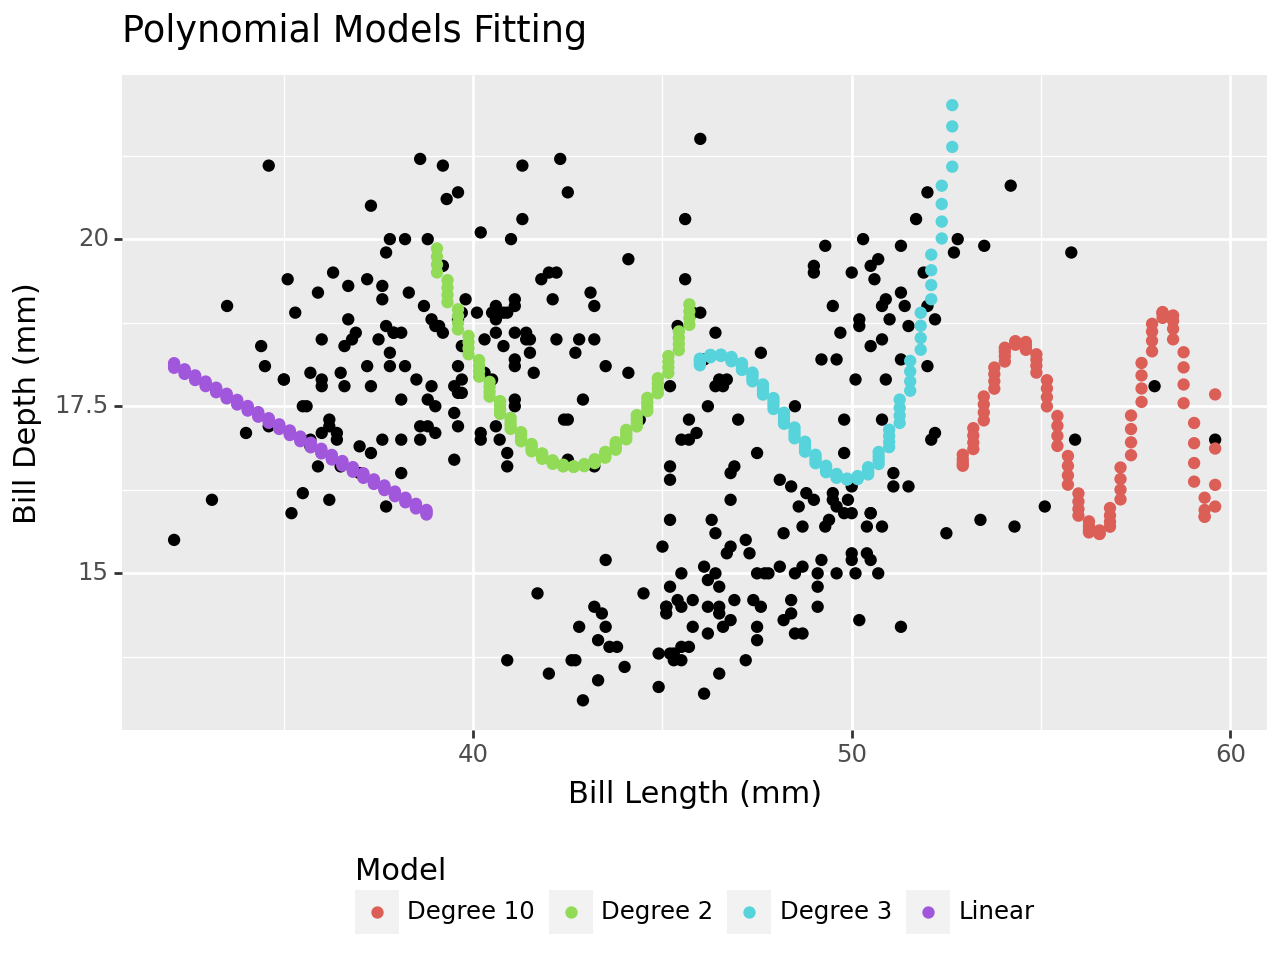

<Figure Size: (640 x 480)>

In [35]:

df_predictions = pd.DataFrame({
    'Bill Length (mm)': np.repeat(X_range.flatten(), len(polynomial_degrees) + 1),
    'Bill Depth (mm)': np.concatenate(([y_linear_pred] + list(polynomial_predictions.values()))),
    'Model': ['Linear'] * 100 + ['Degree 2'] * 100 + ['Degree 3'] * 100 + ['Degree 10'] * 100
})

df_original = pd.DataFrame({
    'Bill Length (mm)': X['bill_length_mm'],
    'Bill Depth (mm)': y
})

p = (ggplot()
     + geom_point(df_original, aes(x='Bill Length (mm)', y='Bill Depth (mm)'), color='black')
     + geom_point(df_predictions, aes(x='Bill Length (mm)', y='Bill Depth (mm)', color='Model'))
     + labs(title='Polynomial Models Fitting', x='Bill Length (mm)', y='Bill Depth (mm)')
     + theme(legend_position='bottom')
)

p


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Degree 2 and 3 appear to be overfitting to the data. Linear appears to capture the trend best. Degree 10 does not work at all